In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

In [4]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
y_pred = model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[56  2]
 [ 5 17]]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [9]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.894736842105


In [10]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.772727272727


In [11]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.829268292683


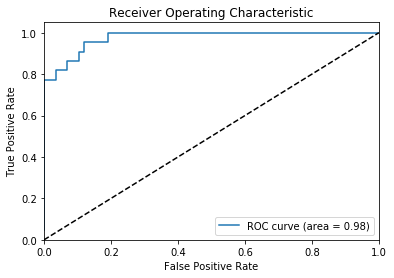

AUROC: 0.976489028213


In [12]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUROC:", roc_auc)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Social_Network_Ads.csv')

In [15]:
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

In [16]:
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
np.random.seed(0)
weights = np.random.rand(2)
bias = np.random.rand()

In [18]:
learning_rate = 0.01
num_iterations = 1000

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [21]:
losses = []
for i in range(num_iterations):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    
    loss = binary_cross_entropy(y_train, y_pred)
    losses.append(loss)
    
    gradient_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    gradient_bias = np.mean(y_pred - y_train)
    
    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

In [22]:
y_pred = sigmoid(np.dot(X_test, weights) + bias)

In [23]:
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

In [24]:
accuracy = np.mean(y_pred_class == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8875


In [25]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 1.31866175  0.80571126]
Bias: -0.51181110106


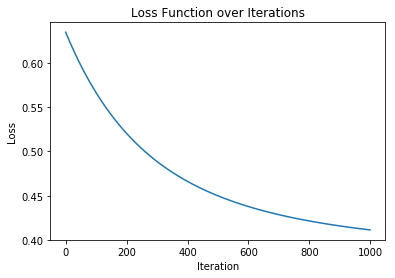

In [26]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()

In [27]:
np.random.seed(0)
weights = np.random.rand(2)
bias = np.random.rand()

In [28]:
learning_rate = 0.01
num_iterations = 1000
batch_size = 50

In [29]:
losses = []
for i in range(num_iterations):
    for j in range(0, len(X_train), batch_size):
        X_batch = X_train[j:j+batch_size]
        y_batch = y_train[j:j+batch_size]

        z = np.dot(X_batch, weights) + bias
        y_pred = sigmoid(z)

        loss = binary_cross_entropy(y_batch, y_pred)
        losses.append(loss)

        gradient_weights = np.dot(X_batch.T, (y_pred - y_batch)) / len(X_batch)
        gradient_bias = np.mean(y_pred - y_batch)

        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

In [30]:
y_pred = sigmoid(np.dot(X_test, weights) + bias)

In [31]:
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

In [32]:
accuracy = np.mean(y_pred_class == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [33]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 2.24483986  1.10911315]
Bias: -1.04104122743


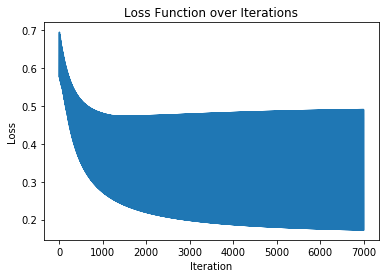

In [34]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Social_Network_Ads.csv')

In [37]:
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

In [38]:
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
np.random.seed(0)
weights = np.random.rand(2)
bias = np.random.rand()

In [40]:
learning_rate = 0.01
num_iterations = 1000

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [42]:
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [43]:
losses = []
for i in range(num_iterations):
    for j in range(len(X_train)):
        random_index = np.random.randint(0, len(X_train))
        X = X_train[random_index]
        y_true = y_train[random_index]

        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        loss = binary_cross_entropy(y_true, y_pred)
        losses.append(loss)

        gradient_weights = (y_pred - y_true) * X
        gradient_bias = (y_pred - y_true)

        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

In [44]:
y_pred = sigmoid(np.dot(X_test, weights) + bias)

In [45]:
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

In [46]:
accuracy = np.mean(y_pred_class == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [47]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 2.11917379  1.17432595]
Bias: -1.06230450324


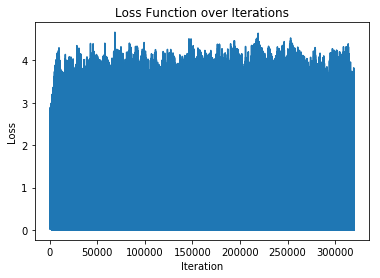

In [48]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()